In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import dash
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import seaborn as sns

In [3]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px
import pandas as pd
import dash_bootstrap_components as dbc

# Load your dataset
df = pd.read_csv('merged.csv')

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("YouTube Video Statistics Dashboard"), width={'size': 6, 'offset': 3}, className="mb-4 mt-4")),
    dbc.Row([
        dbc.Col(dcc.Graph(id='geo-plot'), width=12),
        dbc.Col(dcc.Dropdown(
            id='country-dropdown',
            # Directly use the unique country names from the DataFrame
            options=[{'label': country, 'value': country} for country in df['region'].unique()],
            value=['USA'],  # Default value, make sure it exists in your column
            multi=True
        ), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='likes-plot'), width=6),
        dbc.Col(dcc.Graph(id='views-plot'), width=6),
    ])
])

@app.callback(
    [Output('geo-plot', 'figure'),
     Output('likes-plot', 'figure'),
     Output('views-plot', 'figure')],
    [Input('country-dropdown', 'value')]
)
def update_graphs(selected_countries):
    # Check if selected_countries is a list, if not, make it a list
    if not isinstance(selected_countries, list):
        selected_countries = [selected_countries]

    if not selected_countries:
        # If nothing is selected, consider all countries
        selected_countries = df['region'].unique().tolist()
    
    # Filter the DataFrame based on selected countries
    filtered_df = df[df['region'].isin(selected_countries)]
    print(filtered_df)  # Debugging output

    # Geo plot
    geo_fig = px.scatter_geo(filtered_df, locations='region', locationmode='country names', 
                             size='views', color='region', projection='natural earth', 
                             hover_name='title', title='Global Views Distribution')
    
    # Likes plot
    likes_fig = px.bar(filtered_df, x='region', y='likes', color='region', 
                       title='Likes by Country')
    
    # Views plot
    views_fig = px.bar(filtered_df, x='region', y='views', color='region', 
                       title='Views by Country')

    return geo_fig, likes_fig, views_fig

if __name__ == '__main__':
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

In [5]:
data = pd.DataFrame()

if os.path.exists("merged.csv"):
    os.remove("merged.csv")

region_names = {
    'CA': 'Canada', 
    'KR': 'South Korea', 
    'JP': 'Japan', 
    'US': 'USA', 
    'GB': 'United Kingdom', 
    'DE': 'Germany', 
    'MX': 'Mexico',
    'RU': 'Russia',
    'FR': 'France',
    'IN': 'India'
}

for file in os.listdir():
    if file.endswith(".csv"):
        region = file.split('videos.csv')[0]
        region_name = region_names.get(region, region)  

        with open(file, 'r', encoding='ISO-8859-1') as f:
            region_data = pd.read_csv(f)
            region_data["region"] = region_name  
            data = pd.concat([data, region_data], ignore_index=True)

data.to_csv('merged.csv', index=False)


(375942, 17)
[10 23 24 25 22 26  1 28 20 17 29 15 19  2 27 43 30 44]


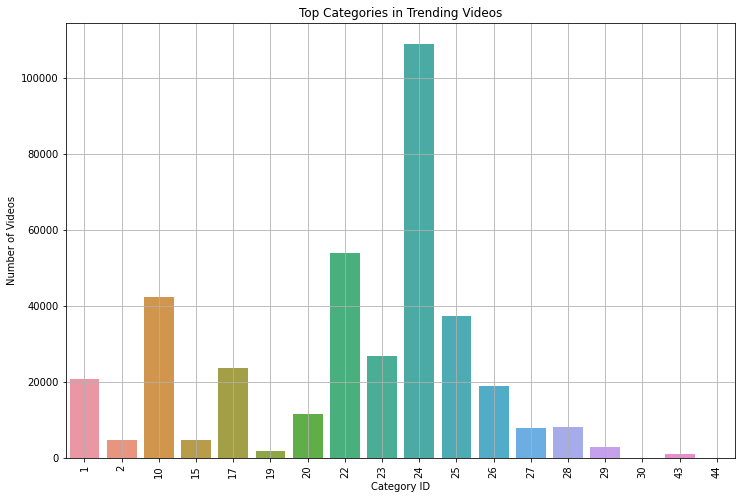

In [6]:
data = pd.read_csv("merged.csv")
# print(data.describe())
print(data.shape)
print(data["category_id"].unique())

# Category analysis
category_counts = data['category_id'].value_counts()

# Plotting the top categories
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top Categories in Trending Videos')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=90)
plt.grid()
plt.show();

In [15]:
data.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
region                        0
dtype: int64

data["channel_title"].is_na()

In [8]:
data = pd.read_csv("merged.csv")
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Canada
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,Canada
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,Canada
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Canada
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick âº https://S...,Canada
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,Canada


In [10]:
data.shape

(375942, 17)

In [7]:
ca_data = pd.read_csv("CAvideos.csv")
print(ca_data["category_id"].unique())
de_data = pd.read_csv("DEvideos.csv")
print(de_data["category_id"].unique())

ca_data.head(10)

[10 23 24 25 22 26  1 28 20 17 29 15 19  2 27 43 30]
[24 23 27 22  1  2 17 26 25 10 20 43 28 29 15 19 44 30]


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...


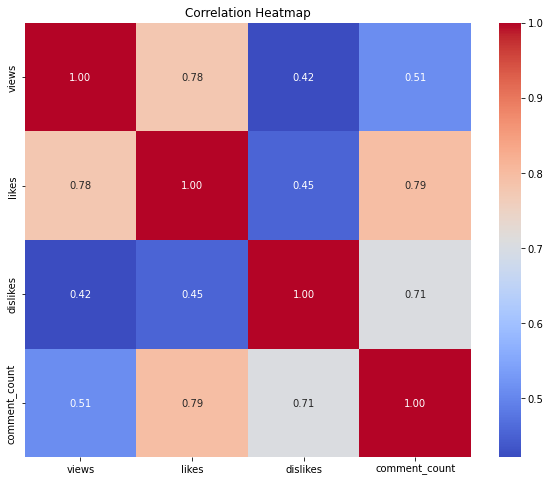

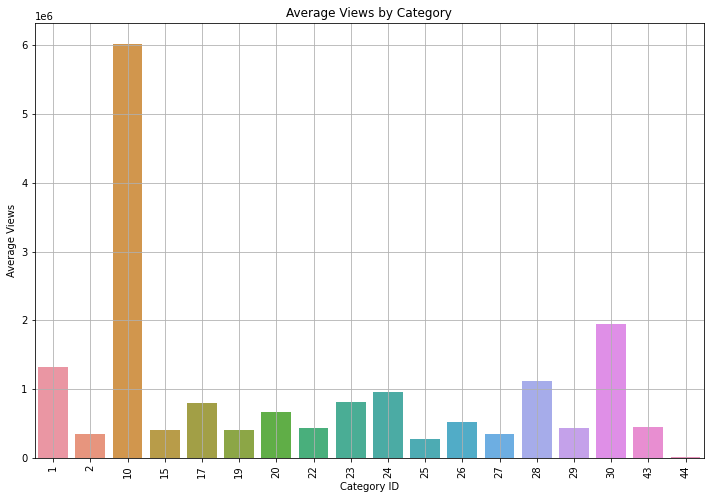

In [22]:
# 1. Correlation Heatmap
# Selecting numerical columns for correlation analysis
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']
# Assuming 'youtube_data' is your DataFrame
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(0)
    data[col] = data[col].astype(int)

correlation_matrix = data[numerical_cols].corr()
# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 2. Average Views by Category
# Grouping data by category and calculating the average views
avg_views_by_category = data.groupby('category_id')['views'].mean().sort_values(ascending=False)

# Plotting average views by category
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_views_by_category.index, y=avg_views_by_category.values)
plt.title('Average Views by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Views')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [23]:
# reg_videos = data.groupby("region").value_counts()
data.shape

(375942, 17)

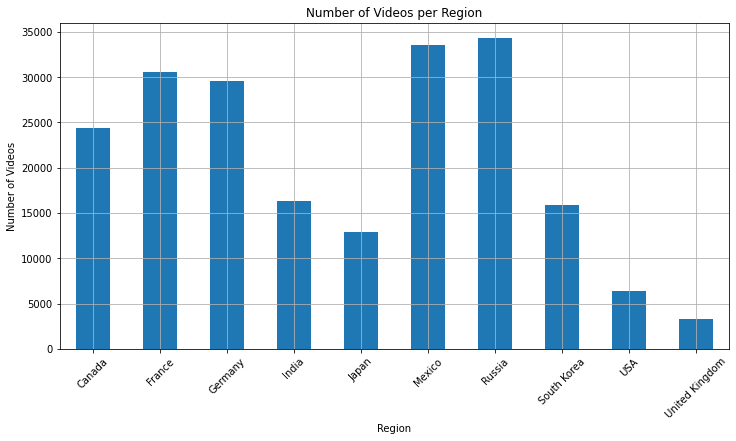

In [24]:
reg_videos = data.groupby("region")['video_id'].nunique()
reg_videos.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Videos per Region')
plt.xlabel('Region')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [27]:
# import dash
# from dash import html, dcc
# from dash.dependencies import Input, Output
# import plotly.graph_objects as go
# import pandas as pd

# # Example data with latitude, longitude, and YouTube stats for different regions
# data = {
#     'Region': ['USA', 'Brazil', 'France', 'Nigeria', 'India', 'Australia', 'Antarctica', 'Egypt', 'Kazakhstan', 'Japan'],
#     'Latitude': [37.0902, -14.2350, 46.2276, 9.0820, 20.5937, -25.2744, -82.8628, 26.8206, 48.0196, 36.2048],
#     'Longitude': [-95.7129, -51.9253, 2.2137, 8.6753, 78.9629, 133.7751, 135.0000, 30.8025, 66.9237, 138.2529],
#     'Views': [200000, 180000, 250000, 150000, 300000, 120000, 50000, 160000, 90000, 220000],
#     'Likes': [10000, 9000, 12000, 7500, 15000, 6000, 2500, 8000, 4500, 11000],
#     'Dislikes': [500, 400, 600, 350, 700, 300, 100, 320, 180, 430]
# }
# df = pd.DataFrame(data)

# # Initialize the Dash app
# app = dash.Dash(__name__)

# # Define the layout of the app
# app.layout = html.Div([
#     dcc.Graph(id='world-3d-globe')
# ])

# # Callback to update the globe
# @app.callback(
#     Output('world-3d-globe', 'figure'),
#     Input('world-3d-globe', 'hoverData')
# )
# def update_output(hoverData):
#     # Create the globe visualization
#     globe = go.Figure()

#     # Add country boundaries and names
#     globe.add_trace(go.Scattergeo(
#         lon=df['Longitude'],
#         lat=df['Latitude'],
#         text=df['Region'] + '<br>Views: ' + df['Views'].astype(str) + '<br>Likes: ' + df['Likes'].astype(str) + '<br>Dislikes: ' + df['Dislikes'].astype(str),
#         mode='markers+text',
#         marker=dict(
#             size=8,
#             color='blue',
#             line=dict(width=1, color='DarkSlateGrey')
#         )
#     ))

#     # Configure the geographic layout
#     globe.update_geos(
#         projection_type="orthographic",
#         showcountries=True,  # Show country boundaries
#         countrycolor="RebeccaPurple",
#         showcoastlines=True,
#         coastlinecolor="RebeccaPurple",
#         showland=True,
#         landcolor="LightGreen",
#         showocean=True,
#         oceancolor="LightBlue",
#         projection_rotation=dict(lon=0, lat=0, roll=0),
#     )

#     globe.update_layout(
#         title='YouTube Stats by Country',
#         geo=dict(
#             showframe=False,
#             showcoastlines=False,
#             projection_type='orthographic'
#         ),
#         height=600,
#         margin={"r":0,"t":30,"l":0,"b":0}
#     )

#     return globe

# # Run the server
# if __name__ == '__main__':
#     app.run_server(debug=True)


In [5]:
df = pd.read_csv('merged.csv')

# Map the 'region' column to full country names
region_map = {
    'Canada': 'Canada', 'South Korea': 'South Korea', 'Japan': 'Japan', 'USA': 'USA', 
    'United Kingdom': 'United Kingdom', 'Germany': 'Germany', 'Mexico': 'Mexico',
    'Russia': 'Russia', 'France': 'France', 'India': 'India'
}
df['country'] = df['region'].map(region_map)

if not isinstance(selected_countries, list):
        selected_countries = [selected_countries]

    if not selected_countries:
        # If nothing is selected, consider all countries
        selected_countries = list(region_map.keys())
    
    # Ensure that we filter by the keys that are used in the DataFrame, which are 'region' codes
    filtered_df = df[df['region'].isin(selected_countries)]
    print(filtered_df)



NameError: name 'selected_countries' is not defined

In [7]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px
import pandas as pd
import dash_bootstrap_components as dbc

# Load your dataset
df = pd.read_csv('merged.csv')

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("YouTube Video Statistics Dashboard"), width={'size': 6, 'offset': 3}, className="mb-4 mt-4")),
    dbc.Row([
        dbc.Col(dcc.Graph(id='geo-plot'), width=12),
        dbc.Col(dcc.Dropdown(
            id='country-dropdown',
            # Directly use the unique country names from the DataFrame
            options=[{'label': country, 'value': country} for country in df['region'].unique()],
            value=['USA'],  # Default value, make sure it exists in your column
            multi=True
        ), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='likes-plot'), width=6),
        dbc.Col(dcc.Graph(id='views-plot'), width=6),
    ])
])

@app.callback(
    [Output('geo-plot', 'figure'),
     Output('likes-plot', 'figure'),
     Output('views-plot', 'figure')],
    [Input('country-dropdown', 'value')]
)
def update_graphs(selected_countries):
    # Check if selected_countries is a list, if not, make it a list
    if not isinstance(selected_countries, list):
        selected_countries = [selected_countries]

    if not selected_countries:
        # If nothing is selected, consider all countries
        selected_countries = df['region'].unique().tolist()
    
    # Filter the DataFrame based on selected countries
    filtered_df = df[df['region'].isin(selected_countries)]
    print(filtered_df)  # Debugging output

    # Geo plot
    geo_fig = px.scatter_geo(filtered_df, locations='region', locationmode='country names', 
                             size='views', color='region', projection='natural earth', 
                             hover_name='title', title='Global Views Distribution')
    
    # Likes plot
    likes_fig = px.bar(filtered_df, x='region', y='likes', color='region', 
                       title='Likes by Country')
    
    # Views plot
    views_fig = px.bar(filtered_df, x='region', y='views', color='region', 
                       title='Views by Country')

    return geo_fig, likes_fig, views_fig

if __name__ == '__main__':
    app.run_server(debug=True)


           video_id trending_date  \
334993  2kyS6SvSYSE      17.14.11   
334994  1ZAPwfrtAFY      17.14.11   
334995  5qpjK5DgCt4      17.14.11   
334996  puqaWrEC7tY      17.14.11   
334997  d380meD0W0M      17.14.11   
...             ...           ...   
375937  BZt0qjTWNhw      18.14.06   
375938  1h7KV2sjUWY      18.14.06   
375939  D6Oy4LfoqsU      18.14.06   
375940  oV0zkMe1K8s      18.14.06   
375941  ooyjaVdt-jA      18.14.06   

                                                    title  \
334993                 WE WANT TO TALK ABOUT OUR MARRIAGE   
334994  The Trump Presidency: Last Week Tonight with J...   
334995  Racist Superman | Rudy Mancuso, King Bach & Le...   
334996                   Nickelback Lyrics: Real or Fake?   
334997                           I Dare You: GOING BALD!?   
...                                                   ...   
375937                       The Cat Who Caught the Laser   
375938                         True Facts : Ant Mutualism   
375939